In [0]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

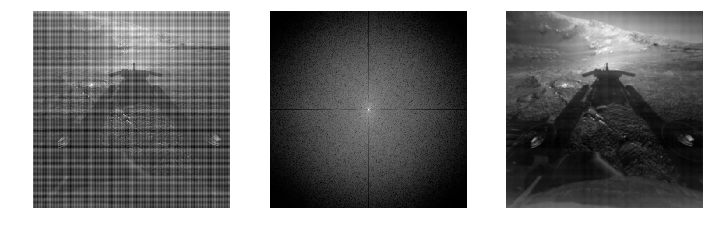

In [3]:
img = cv2.imread("MarteC.jpeg", 0)

f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)

rows, cols = img.shape
crow, ccol = rows//2, cols//2

mask = np.zeros((rows, cols))

desv = 100
for i in range(0, rows):
  for j in range(0, cols):
    if i == crow or j == ccol:
      mask[i, j] = np.exp( - ((crow-i)**2 + (ccol-j)**2) / (desv**2) ) / (np.sqrt((i-crow)**2+(j-ccol)**2)+0.1)
    else:
      mask[i, j] = np.exp( - ((crow-i)**2 + (ccol-j)**2) / (desv**2) )

fshift = fshift * mask

magnitud = 20 * np.log( 1 + np.abs(fshift) )

f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

plt.figure(figsize=(12, 12))

plt.subplot(1,3,1)
plt.axis("off")
plt.imshow(img, cmap="gray")

plt.subplot(1,3,2)
plt.axis("off")
plt.imshow(magnitud, cmap="gray")

plt.subplot(1,3,3)
plt.axis("off")
plt.imshow(img_back, cmap="gray")

plt.show()